In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_usa = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_usa = df_usa.dropna(subset='salary_year_avg')

df_usa = df_usa.explode('job_skills')

In [3]:
df_usa_group = df_usa.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_usa_top_pay = df_usa_group.sort_values(by='median', ascending=False).head(10)

df_usa_skills = df_usa_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

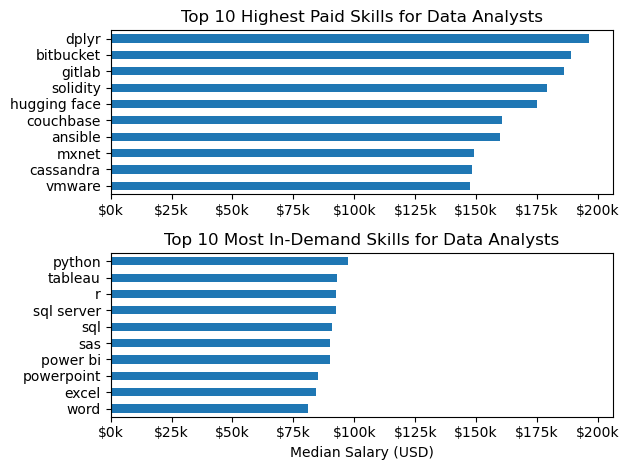

In [4]:
fig, ax = plt.subplots(2, 1)

df_usa_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

df_usa_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

fig.tight_layout()
plt.show()

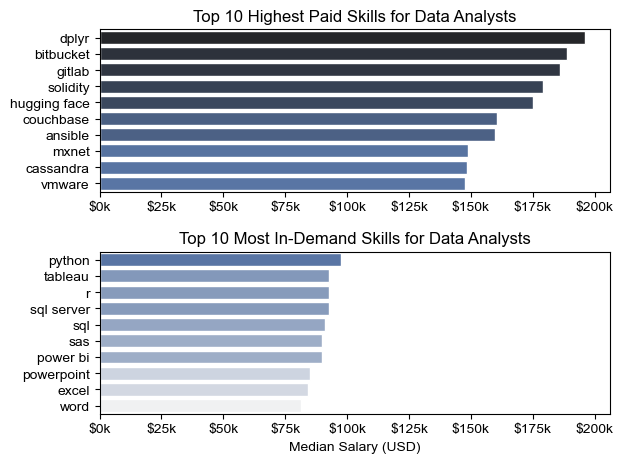

In [5]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

#Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_usa_top_pay, x='median', y=df_usa_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_usa_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

#Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_usa_skills, x='median', y=df_usa_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

#df_usa_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

fig.tight_layout()
plt.show()

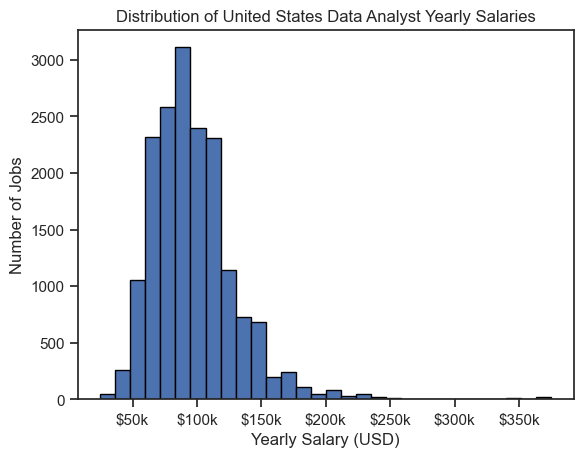

In [9]:
df_usa['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k'))
plt.show()

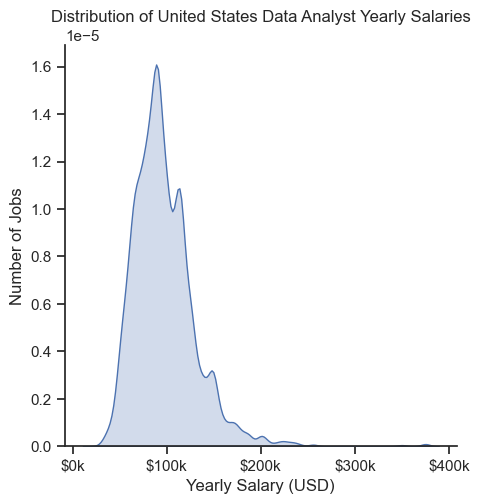

In [10]:
sns.displot(df_usa['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k'))
plt.show()

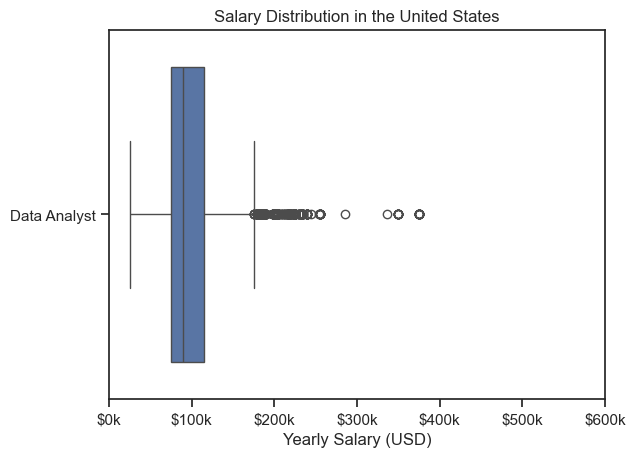

In [ ]:
sns.boxplot(data=df_usa, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()